In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from numpy import arange
from numpy import meshgrid
import numpy as np

from box_utils import prepare_boxes_plot, mul_intervals, pow_interval, neg_interval, subtr_intervals
from boxapprox import box_parallel, approximate_boxes
%matplotlib widget

In [2]:
xb = np.array([-5.,10.])
yb = np.array([-5.,10.])

#y=xy-x**2
#y-xy+x**2 = 0
#[x,y,b,p]

B = np.asarray([xb,yb,mul_intervals(xb,yb),pow_interval(xb,2)])

A_eq = np.array([[0,1,-1,1]]) #колво равенств (строки)
b_eq = np.array([0]) # правые части равенств

sqr_pairs = [(0,3)]
cross_triplets = [(0,1,2)]

P = [B]
# threshold_s = np.array([0.05, 0.05, 1, 1, 1])
# threshold_s = [0.1, 0.1, 1, 1, 1]

# sols = box_serial(P, A_eq, b_eq, sqr_pairs, cross_triplets, [0.1,0.1,4.,4.])
sols = box_parallel(P, A_eq, b_eq, sqr_pairs, cross_triplets, [0.05,0.05,4.,4.])

# for s in sols:
#     print(s)

Starting box approximation on 3 processes.
-------------------
unexplored: 1
unexplored: 2
unexplored: 4
unexplored: 8
unexplored: 16
unexplored: 32
unexplored: 64
unexplored: 128
unexplored: 160
unexplored: 126
unexplored: 160
unexplored: 220
unexplored: 176
unexplored: 110
unexplored: 168
unexplored: 16
unexplored: 0
Search took 16.261 seconds
-------------------
unexplored: 0
solutions: 696


In [3]:
# y4=y2-x2
# x2 = x**2
# y2 = y**2
# y4 = y2**2

# x2-y2+y4=0
# X = [x,y,x2,y2,y4]

xb = np.array([-0.75,0.75])
yb = np.array([-1.25,1.25])
# xb = np.array([-.2,.2])
# yb = np.array([-.2,.2])

B = np.asarray([xb,yb,pow_interval(xb,2),pow_interval(yb,2),pow_interval(yb,4)])

A_eq = np.array([[0,0,1,-1,1]]) #колво равенств
b_eq = np.array([0]) # правые части равенств

sqr_pairs = [(0,2), (1,3), (3,4)]
cross_triplets = []


threshold_s = np.array([0.05, 0.05, 1, 1, 1])
# threshold_s = [0.1, 0.1, 1, 1, 1]

sols_8 = approximate_boxes(B, A_eq, b_eq, sqr_pairs, cross_triplets, threshold_s)

# for s in sols:
#     print(s)
print(len(sols_8))

Starting single-threaded box approximation.
lenP 1
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
lenP 2
valid indexes [0 1 2 3 4]
lenP 3
valid indexes [0 1 2 3 4]
lenP 4
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
lenP 5
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
lenP 6
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
lenP 7
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
lenP 8
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
lenP 9
valid indexes [0 1 2 3 4]
lenP 8
valid indexes [0 1 2 3 4]
lenP 7
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
lenP 8
lenP 7
lenP 6
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
valid indexes [0 1 2 3 4]
lenP 7
valid indexes [0 1 2 3 4]
lenP 6
valid indexes [0 1 2 3 4]
lenP 5
valid indexes [0 1 2 3 4]
valid

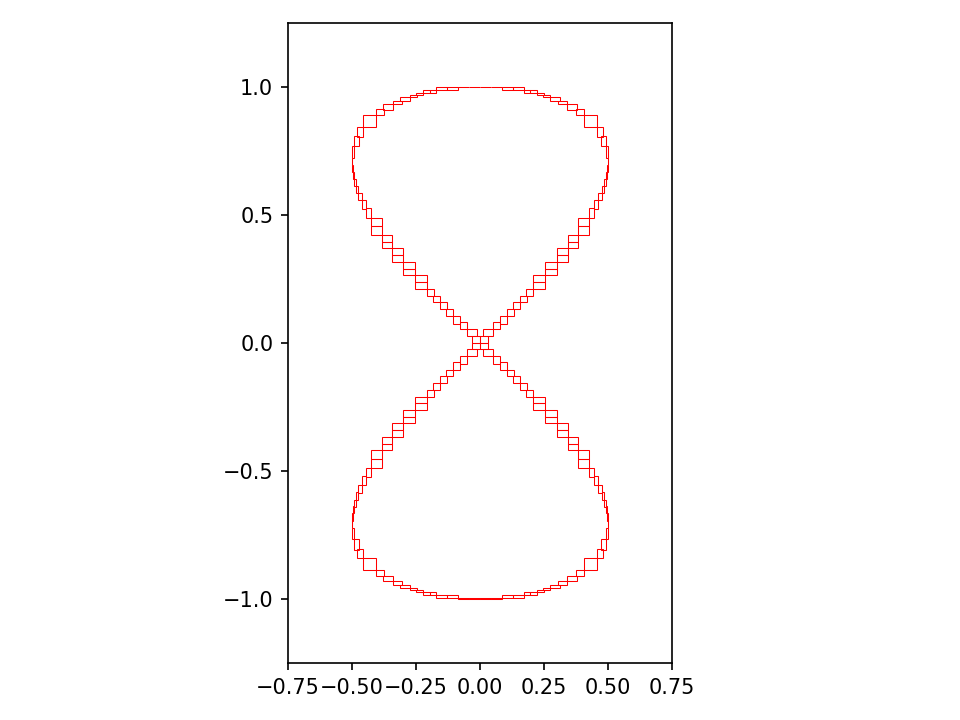

In [4]:
delta = 0.025
xrange = arange(-5.0, 20.0, delta)
yrange = arange(-5.0, 20.0, delta)
X, Y = meshgrid(xrange,yrange)

F = Y**4
G = Y**2 - X**2

fig = plt.figure(dpi=150)
# plt.contour(X, Y, (F - G), [0])
ax = plt.gca()
# ax = fig.axes[0]

for b in sols_8:#[:4]:
    # print(b)
    xlb, xub = b[0,0], b[0,1]
    ylb, yub = b[1,0], b[1,1]
    ax.add_patch(Rectangle((xlb,ylb),xub-xlb,yub-ylb,linewidth=1/2,edgecolor='r',facecolor='none'))

plt.xlim([-0.75,0.75])
plt.ylim([-1.25,1.25])
# plt.xlim([-.2,.2])
# plt.ylim([-.2,.2])

ax.set_aspect(1)
plt.tight_layout()

plt.show()

In [5]:
xb = np.array([-5.,10.])
yb = np.array([-5.,10.])

#y=xy-x**2
#y-xy+x**2 = 0
#[x,y,b,p]

B = np.asarray([xb,yb,mul_intervals(xb,yb),pow_interval(xb,2)])

A_eq = np.array([[0,1,-1,1]]) #колво равенств (строки)
b_eq = np.array([0]) # правые части равенств

sqr_pairs = [(0,3)]
cross_triplets = [(0,1,2)]


# threshold_s = np.array([0.05, 0.05, 1, 1, 1])
# threshold_s = [0.1, 0.1, 1, 1, 1]

sols = approximate_boxes(B, A_eq, b_eq, sqr_pairs, cross_triplets, [1.,1.,4.,4.])

# for s in sols:
#     print(s)
print(len(sols))

Starting single-threaded box approximation.
lenP 1
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
lenP 2
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
lenP 3
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
lenP 4
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
lenP 5
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
lenP 6
valid indexes [0 1 2 3]
lenP 5
valid indexes [0 1 2 3]
lenP 4
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
lenP 5
valid indexes [0 1 2 3]
lenP 4
valid indexes [0 1 2 3]
lenP 3
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
lenP 4
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
lenP 5
valid indexes [0 1 2 3]
lenP 4
valid indexes [0 1 2 3]
lenP 3
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
lenP 4
valid indexes [0 1 2 3]
lenP 3
valid indexes [0 1 2 3]
lenP 2
valid indexes [0 1 2 3]
valid indexes [0 1 2 3]
valid indexes 

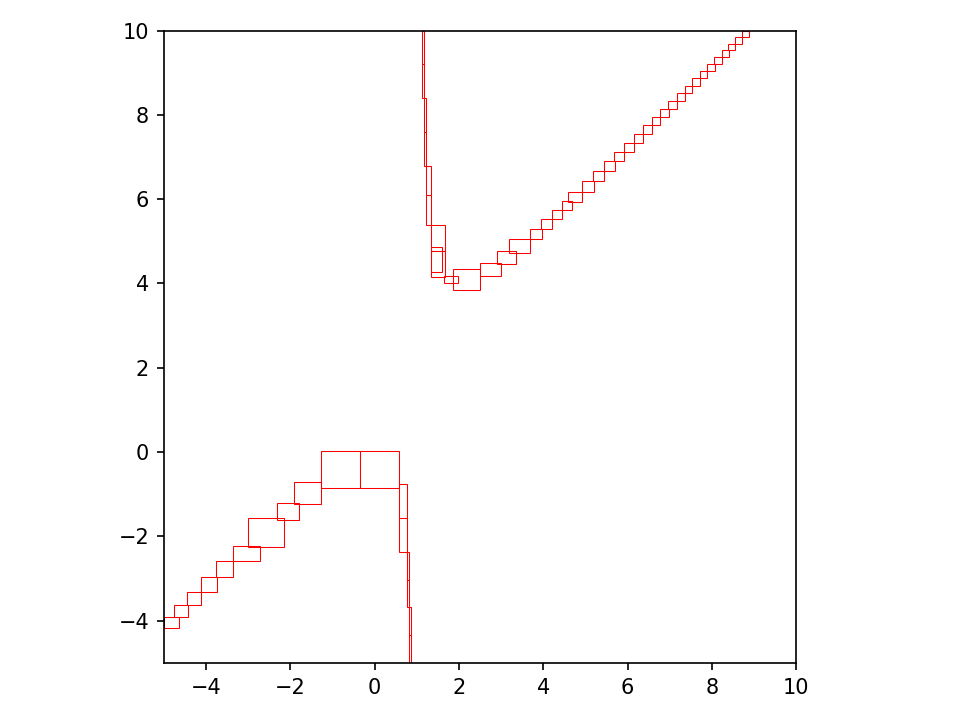

In [6]:
delta = 0.025
xrange = arange(-5.0, 20.0, delta)
yrange = arange(-5.0, 20.0, delta)
X, Y = meshgrid(xrange,yrange)

xl = np.array([-5,10])
yl = np.array([-5,10])


F = Y
G = X*Y - X**2

fig = plt.figure(dpi=150)
# plt.contour(X, Y, (F - G), [0])
ax = plt.gca()

for b in sols:
    # print(b)
    xlb, xub = b[0,0], b[0,1]
    ylb, yub = b[1,0], b[1,1]
    ax.add_patch(Rectangle((xlb,ylb),xub-xlb,yub-ylb,linewidth=1/2,edgecolor='r',facecolor='none'))

plt.xlim(xl)
plt.ylim(yl)
# # plt.xlim([-.2,.2])
# # plt.ylim([-.2,.2])

ax.set_aspect(1)
plt.tight_layout()

plt.show()

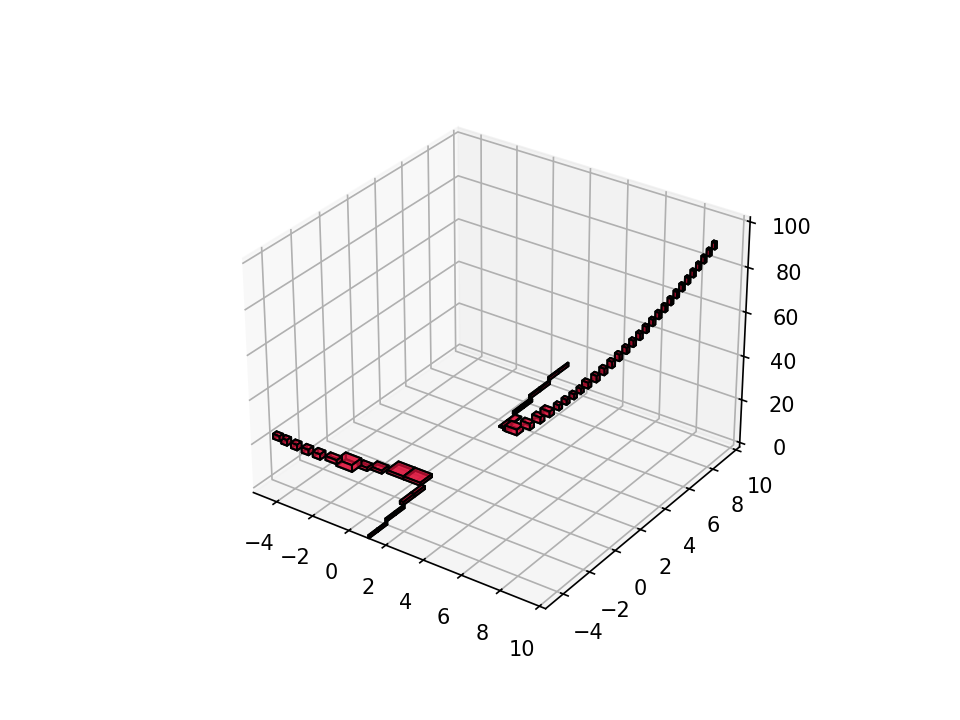

In [7]:
# positions = [(-3,5,-2),(1,7,1)]
# sizes = [(4,5,3), (3,3,7)]

inp = sols
# inp = [np.array([(0,2),(1,3),(-1,2)])]

positions = np.zeros((len(inp),3)) #[(0,0,0)]
sizes = np.zeros((len(inp),3)) #[(1,1,1)]

z_ind = 2

for i,b in enumerate(inp):
    # print(b)
    xlb, xub = b[0,0], b[0,1]
    ylb, yub = b[1,0], b[1,1]
    zlb, zub = b[z_ind,0], b[z_ind,1]
    # print(b[z_ind,:])
    positions[i,:] = xlb, ylb, zlb
    sizes[i,:] = xub-xlb, yub-ylb, zub-zlb

colors = ["crimson"]*len(inp) #,"limegreen" "crimson"
# colors = [[1.,0.,0.,1.0],[0.,1.,0.,1.]]


pc = prepare_boxes_plot(positions,sizes,colors=colors, edgecolor='k', alpha=0.7)

plt.figure(dpi=150)
plt.subplot(111,projection='3d')
ax = plt.gca()
ax.add_collection3d(pc)
 
ax.set_xlim([-5,10])
ax.set_ylim([-5,10])
# ax.set_zlim([-50,100])
ax.set_zlim([0,100])

# ax.set_aspect('equal')

ax.view_init(elev=30., azim=-55)

# for ii in xrange(0,360,1):
#     ax.view_init(elev=10., azim=ii)
#     savefig("movie%d.png" % ii)

plt.show()

In [8]:
xb = np.array([-5.,10.])
yb = np.array([-5.,10.])

#y=xy-x**2
#y-xy+x**2 = 0
#[x,y,b,p]

B = np.asarray([xb,yb,mul_intervals(xb,yb),pow_interval(xb,2)])

A_eq = np.array([[0,1,-1,1]]) #колво равенств (строки)
b_eq = np.array([0]) # правые части равенств

sqr_pairs = [(0,3)]
cross_triplets = [(0,1,2)]

P = [B]
# threshold_s = np.array([0.05, 0.05, 1, 1, 1])
# threshold_s = [0.1, 0.1, 1, 1, 1]

# sols = box_serial(P, A_eq, b_eq, sqr_pairs, cross_triplets, [0.04,0.04,4.,4.])
sols = box_parallel(P, A_eq, b_eq, sqr_pairs, cross_triplets, [.04,.04,4.,4.])

# sols = approximate_boxes(B, A_eq, b_eq, sqr_pairs, cross_triplets, [0.04,0.04,4.,4.])

# for s in sols:
#     print(s)

Starting box approximation on 3 processes.
-------------------
unexplored: 1
unexplored: 2
unexplored: 4
unexplored: 8
unexplored: 16
unexplored: 32
unexplored: 64
unexplored: 128
unexplored: 242
unexplored: 156
unexplored: 162
unexplored: 296
unexplored: 322
unexplored: 140
unexplored: 172
unexplored: 80
unexplored: 0
Search took 19.397 seconds
-------------------
unexplored: 0
solutions: 913


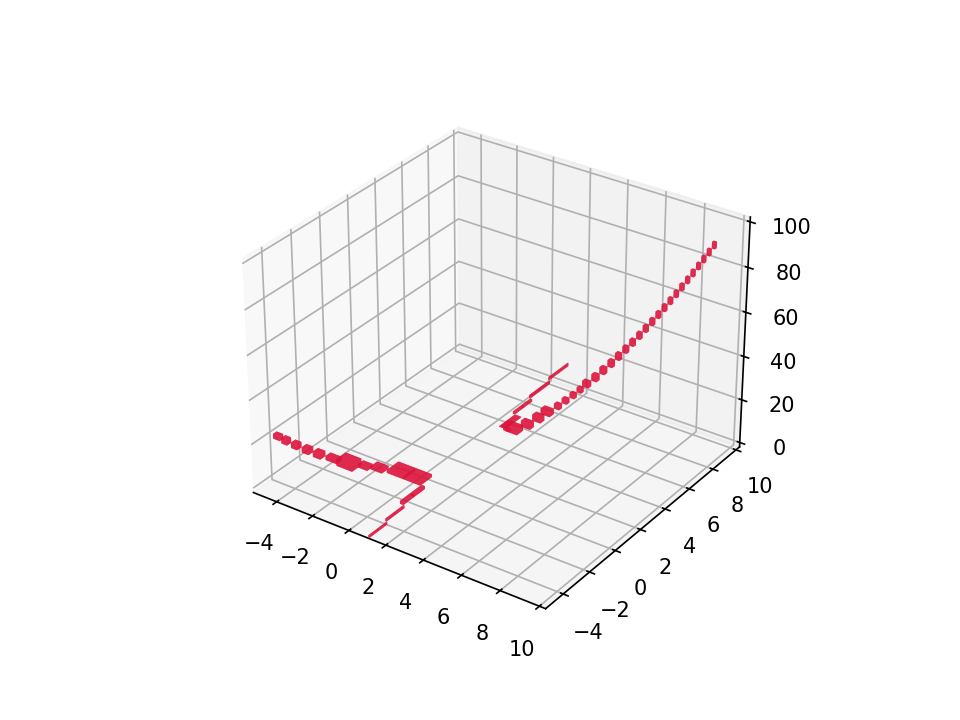

In [15]:
inp = sols
# inp = [np.array([(0,2),(1,3),(-1,2)])]

positions = np.zeros((len(inp),3)) #[(0,0,0)]
sizes = np.zeros((len(inp),3)) #[(1,1,1)]

z_ind = 2

for i,b in enumerate(inp):
    # print(b)
    xlb, xub = b[0,0], b[0,1]
    ylb, yub = b[1,0], b[1,1]
    zlb, zub = b[z_ind,0], b[z_ind,1]
    # print(b[z_ind,:])
    positions[i,:] = xlb, ylb, zlb
    sizes[i,:] = xub-xlb, yub-ylb, zub-zlb

colors = ["crimson"]*len(inp) #,"limegreen" "crimson"
# colors = [[1.,0.,0.,1.0],[0.,1.,0.,1.]]


pc = prepare_boxes_plot(positions,sizes,colors=colors, edgecolor=None, alpha=0.7)

plt.figure(dpi=150)
plt.subplot(111,projection='3d')
ax = plt.gca()
ax.add_collection3d(pc)
 
ax.set_xlim([-5,10])
ax.set_ylim([-5,10])
# ax.set_zlim([-50,100])
ax.set_zlim([0,100])

# ax.set_aspect('equal')

ax.view_init(elev=30., azim=-55)

# for ii in xrange(0,360,1):
#     ax.view_init(elev=10., azim=ii)
#     savefig("movie%d.png" % ii)

plt.show()